In [3]:
pip install opencv-python-headless numpy

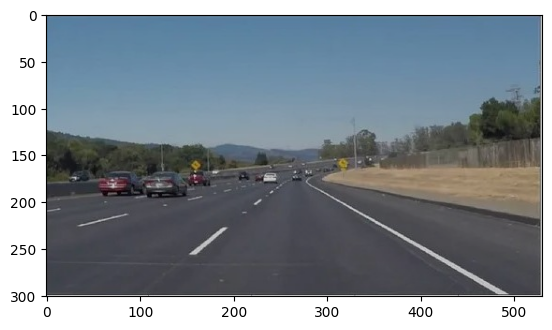

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def gaussian_blur(img, kernel_size=5):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def canny(img, low_threshold=50, high_threshold=150):
    return cv2.Canny(img, low_threshold, high_threshold)

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def hough_lines(img, rho=1, theta=np.pi/180, threshold=15, min_line_len=40, max_line_gap=20):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    return lines

def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    return cv2.addWeighted(initial_img, α, img, β, γ)

def process_image(image):
    gray = grayscale(image)
    blur = gaussian_blur(gray, kernel_size=5)
    edges = canny(blur, low_threshold=50, high_threshold=150)

    imshape = image.shape
    vertices = np.array([[(0, imshape[0]), (450, 320), (490, 320), (imshape[1], imshape[0])]], dtype=np.int32)
    masked_edges = region_of_interest(edges, vertices)

    lines = hough_lines(masked_edges, rho=1, theta=np.pi/180, threshold=15, min_line_len=40, max_line_gap=20)

    line_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    if lines is not None:
        draw_lines(line_image, lines)

    result = weighted_img(line_image, image, α=0.8, β=1., γ=0.)
    return result
# Test the function on an example image
image = cv2.imread('test_image.jpg')
output = process_image(image)

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()

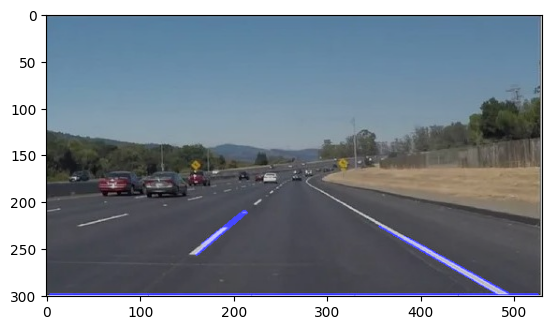

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def grayscale(img):
    """Convert image to grayscale."""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def gaussian_blur(img, kernel_size=5):
    """Apply Gaussian blur to the image."""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def canny(img, low_threshold=50, high_threshold=150):
    """Apply Canny edge detector."""
    return cv2.Canny(img, low_threshold, high_threshold)

def region_of_interest(img, vertices):
    """Mask the region of interest."""
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def hough_lines(img, rho=1, theta=np.pi/180, threshold=15, min_line_len=40, max_line_gap=20):
    """Apply Hough Transform to detect lines."""
    return cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)

def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """Draw lines on an image."""
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    """Combine two images with weights."""
    return cv2.addWeighted(initial_img, α, img, β, γ)

def process_image(image):
    """Process a single image for lane detection."""
    gray = grayscale(image)
    blur = gaussian_blur(gray, kernel_size=5)
    edges = canny(blur, low_threshold=50, high_threshold=150)

    imshape = image.shape
    vertices = np.array([[(0, imshape[0]), (imshape[1] / 2 - 30, imshape[0] / 2 + 50),
                          (imshape[1] / 2 + 30, imshape[0] / 2 + 50), (imshape[1], imshape[0])]], dtype=np.int32)
    masked_edges = region_of_interest(edges, vertices)

    lines = hough_lines(masked_edges, rho=1, theta=np.pi/180, threshold=15, min_line_len=40, max_line_gap=20)

    line_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    draw_lines(line_image, lines)

    result = weighted_img(line_image, image, α=0.8, β=1., γ=0.)
    return result

# Test the function on an example image
image = cv2.imread('test_image.jpg')
output = process_image(image)
# Display the result
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()
